<a href="https://colab.research.google.com/github/chandini-creator/PDS_ASSIGNMENT-3/blob/main/PDS_ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

In [5]:
np.random.seed(42) #random seed
sample_df = df.sample(n=25, random_state=42)

In [6]:
population_mean = df["Glucose"].mean()
population_max = df["Glucose"].max()
sample_mean = sample_df["Glucose"].mean()
sample_max = sample_df["Glucose"].max()

In [7]:
comparison_df = pd.DataFrame({
    'Statistic': ['Mean Glucose', 'Max Glucose'],
    'Population': [population_mean, population_max],
    'Sample (n=25)': [sample_mean, sample_max]
})

In [8]:
print("Comparison of Glucose Statistics:")
print(comparison_df)

Comparison of Glucose Statistics:
      Statistic  Population  Sample (n=25)
0  Mean Glucose  120.894531         116.64
1   Max Glucose  199.000000         183.00


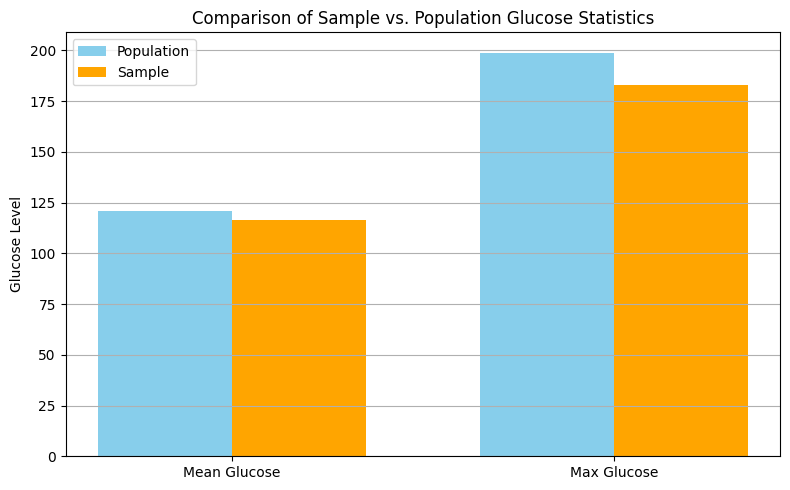

In [9]:
plt.figure(figsize=(8, 5))
x = np.arange(len(comparison_df['Statistic']))
bar_width = 0.35

plt.bar(x, comparison_df['Population'], width=bar_width, label='Population', color='skyblue')
plt.bar(x + bar_width, comparison_df['Sample (n=25)'], width=bar_width, label='Sample', color='orange')

plt.xticks(x + bar_width / 2, comparison_df['Statistic'])
plt.ylabel('Glucose Level')
plt.title('Comparison of Sample vs. Population Glucose Statistics')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

In [10]:
population_bmi_98 = np.percentile(df["BMI"], 98)
sample_bmi_98 = np.percentile(sample_df["BMI"], 98)

In [11]:
bmi_comparison_df = pd.DataFrame({
    'Statistic': ['98th Percentile of BMI'],
    'Population': [population_bmi_98],
    'Sample (n=25)': [sample_bmi_98]
})

In [12]:
print("98th Percentile of BMI Comparison:")
print(bmi_comparison_df)

98th Percentile of BMI Comparison:
                Statistic  Population  Sample (n=25)
0  98th Percentile of BMI      47.526         40.248


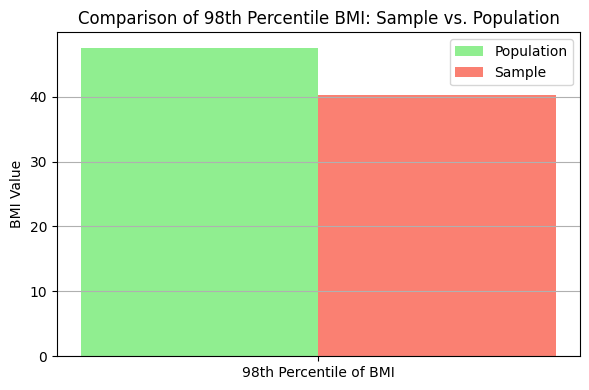

In [13]:
plt.figure(figsize=(6, 4))
x = np.arange(len(bmi_comparison_df['Statistic']))
bar_width = 0.35

plt.bar(x, bmi_comparison_df['Population'], width=bar_width, label='Population', color='lightgreen')
plt.bar(x + bar_width, bmi_comparison_df['Sample (n=25)'], width=bar_width, label='Sample', color='salmon')

plt.xticks(x + bar_width / 2, bmi_comparison_df['Statistic'])
plt.ylabel('BMI Value')
plt.title('Comparison of 98th Percentile BMI: Sample vs. Population')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

In [14]:
num_bootstrap_samples = 500
sample_size = 150

In [15]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

In [16]:
for _ in range(num_bootstrap_samples):
    sample = df["BloodPressure"].sample(n=sample_size, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_percentiles.append(np.percentile(sample, 75))

In [17]:
bootstrap_mean_avg = np.mean(bootstrap_means)
bootstrap_std_avg = np.mean(bootstrap_stds)
bootstrap_percentile_avg = np.mean(bootstrap_percentiles)

In [18]:
population_mean = df["BloodPressure"].mean()
population_std = df["BloodPressure"].std()
population_percentile = np.percentile(df["BloodPressure"], 75)

In [19]:
labels = ['Mean', 'Standard Deviation', '75th Percentile']
population_stats = [population_mean, population_std, population_percentile]
bootstrap_stats = [bootstrap_mean_avg, bootstrap_std_avg, bootstrap_percentile_avg]

In [20]:
print("Bootstrap vs Population Statistics for BloodPressure")
print(pd.DataFrame({
    "Statistic": labels,
    "Population": population_stats,
    "Bootstrap Avg": bootstrap_stats
}))

Bootstrap vs Population Statistics for BloodPressure
            Statistic  Population  Bootstrap Avg
0                Mean   69.105469      69.176920
1  Standard Deviation   19.355807      19.073718
2     75th Percentile   80.000000      79.586500


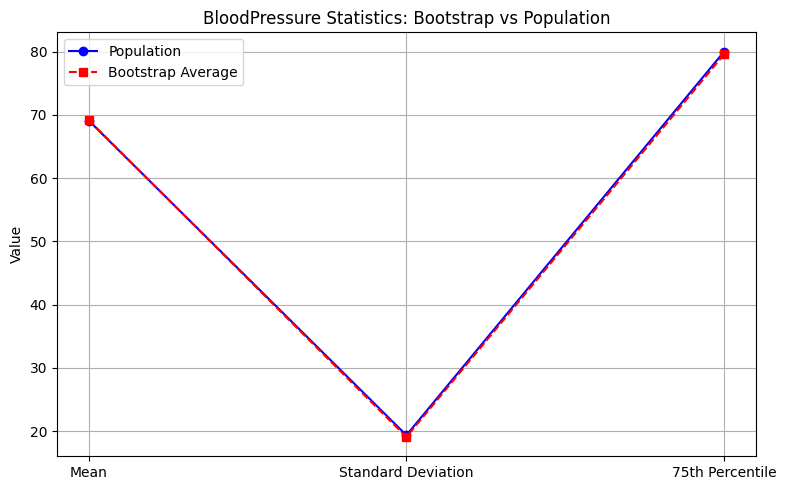

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(labels, population_stats, marker='o', linestyle='-', label='Population', color='blue')
plt.plot(labels, bootstrap_stats, marker='s', linestyle='--', label='Bootstrap Average', color='red')

plt.title('BloodPressure Statistics: Bootstrap vs Population')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Report on Findings: Bootstrap vs Population Statistics for BloodPressure
The comparison between population statistics and bootstrap-based estimates for BloodPressure demonstrates a strong alignment across all three measured metrics: mean, standard deviation, and the 75th percentile. The population mean (69.11) and the bootstrap average mean (69.18) are nearly identical, indicating that repeated sampling with replacement accurately captures the central tendency of the population. Similarly, the standard deviation from the bootstrap samples (19.07) is very close to the population standard deviation (19.36), suggesting that variability within the bootstrap samples mirrors that of the full dataset. The 75th percentile values—80.00 for the population and 79.59 for the bootstrap—further support this observation. The line plot visually confirms the statistical consistency between the two distributions. Overall, the bootstrap approach effectively replicates population characteristics and provides a reliable method for estimating summary statistics.
